In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn import preprocessing 
import numpy as np

%matplotlib inline
train = pd.read_csv('train.csv')
train_sample = train.sample(train.shape[0]/2)
test = pd.read_csv('test.csv')

In [3]:
#remove Na's from the dataframe
def remove_nas(dataframe, percent):
    null_data = dataframe.isnull().sum()
    data_to_remove = null_data[null_data > dataframe.shape[0]*percent].index.tolist()
    dataframe.drop(data_to_remove,1, inplace = True)
    return dataframe

In [4]:
#get the non-numerical data
def categorical_data(dataframe):
    dtype = dataframe.dtypes
    categories = dtype[dtype == 'object'].index.tolist()
    category_dataframe = dataframe[categories]
    return category_dataframe

In [12]:
#give each category a numerial value
def category_to_num(category_data):
    le = preprocessing.LabelEncoder()
    le.fit(np.unique(category_data.values))
    cat = category_data.apply(le.transform)
    return cat

In [13]:
#graph catgeorical data

def graph_processed_data(dataframe_with_sale_price, cat_data):
    num_col = len(cat_data.columns.values)
    graph_dimension = int(round(math.sqrt(num_col)))

    f, ax = plt.subplots(graph_dimension, graph_dimension,figsize=(8,12))
    plt.subplots_adjust( hspace=0.3 )
    plt.subplots_adjust( wspace=0.04 )

    y = dataframe_with_sale_price['SalePrice']
    counter = 0

    list_of_predictors =[]
    
    for i in range(graph_dimension):
        for j in range(graph_dimension):
            ax[i][j].get_yaxis().set_ticks([])
            ax[i][j].get_xaxis().set_ticks([])
            if counter >= num_col:
                continue
            else:
                x = cat_data.iloc[:, counter]
                ax[i][j].scatter(x,y)
                ax[i][j].set_title(cat_data.columns.values[counter])
            
                slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
                print str(cat_data.columns.values[counter]), r_value**2
                #if r_value**2 > 0.3:
                #    list_of_predictors.append(independent_var.columns.values[counter])
                counter = counter + 1

    #final_int_train = independent_var[list_of_predictors]
    #return list_of_predictors, dataframe, final_int_train

/home/jen/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


MSZoning 0.00107370996458
Street 0.00168391517378
LotShape 0.0713918035694
LandContour 0.00692045322473
Utilities 0.000204899074191
LotConfig 0.00624869755273
LandSlope 0.00243977399429
Neighborhood 0.0272235036766
Condition1 0.0246796003016
Condition2 0.00325351621366
BldgType 0.00548338245353
HouseStyle 0.00549260917394
RoofStyle 0.0397265715462
RoofMatl 0.0136730283272
Exterior1st 0.0116290008713
Exterior2nd 0.0109141787403
MasVnrType 0.00915133043576
ExterQual 0.367645409375
ExterCond 0.0120653370036
Foundation 0.198960480254
BsmtQual 0.175288543342
BsmtCond 0.0188273131755
BsmtExposure 0.0204922846792
BsmtFinType1 0.000197182815757
BsmtFinType2 0.0155944610531
Heating 0.00462572782948
HeatingQC 0.121700507553
CentralAir 0.0631658459393
Electrical 0.0569300121546
KitchenQual 0.294480129085
Functional 0.0136638335901
GarageType 0.0498397980172
GarageFinish 0.0548669748942
GarageQual 0.0673830926261
GarageCond 0.0753736306854
PavedDrive 0.0545395088305


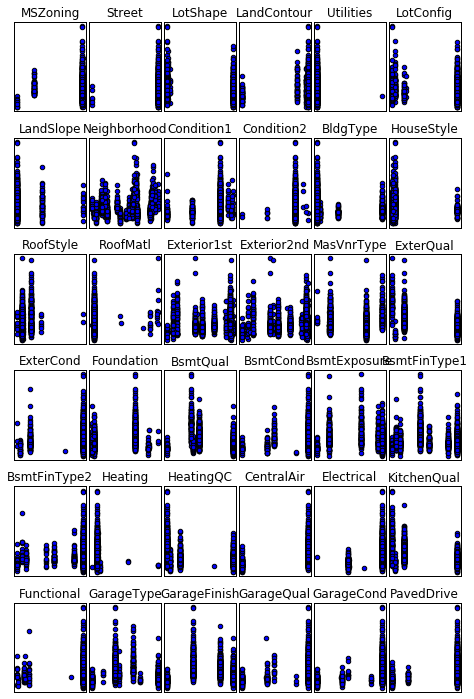

In [14]:
no_na_train = remove_nas(train, 0.1)
cat = categorical_data(no_na_train)
num_cat = category_to_num(cat)
graph_processed_data(no_na_train, num_cat)

In [39]:
num_cat['SalePrice']= no_na_train['SalePrice']

In [40]:
num_cat_sale = num_cat[['SaleCondition', 'SalePrice']]

In [42]:
set(num_cat_sale['SaleCondition'].tolist())

{11, 12, 14, 59, 112, 120}

In [46]:
eleven = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 11].tolist()
twelve = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 12].tolist()
fourteen = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 14].tolist()
fifty_nine = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 59].tolist()
one_twelve = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 112].tolist()
one_twenty = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 120].tolist()

In [51]:
f_val, p_val = stats.f_oneway(eleven,twelve, fourteen)
p_val

0.40178138159081611

In [52]:
f_val, p_val = stats.f_oneway(eleven,twelve, fourteen, fifty_nine)
p_val

0.56463574936333893

In [53]:
f_val, p_val = stats.f_oneway(eleven,twelve, fourteen, one_twenty)
p_val

2.6276741701998584e-19

In [54]:
f_val, p_val = stats.f_oneway(eleven,twelve, fourteen, one_twenty, one_twelve)
p_val

1.1575579611124892e-43